In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

import statistics as stats
from scipy import stats

file_to_load = "belize_airbnb_listings.csv"

# Read Purchasing File and store into Pandas data frame
belize_df = pd.read_csv(file_to_load)

In [3]:
belize_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164


## #1
Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data
a. How do you choose your bin size?

In [ ]:
#Generally, there is no "best" number of bins, and different bin sizes can reveal different features of the data. 
#But there're a few methods/formulas that can help us define the bins size. For example, the square root formula that we use below.
#It takes the square root of the number of data points in the sample 

In [4]:
#using one of the formulas to calculate the bin size
np.sqrt(belize_df.count())

id                                52.877216
name                              52.877216
host_id                           52.877216
host_name                         52.877216
neighbourhood_group               52.877216
neighbourhood                     52.877216
latitude                          52.877216
longitude                         52.877216
room_type                         52.877216
price                             52.877216
minimum_nights                    52.877216
number_of_reviews                 52.877216
last_review                       42.544095
reviews_per_month                 42.544095
calculated_host_listings_count    52.877216
availability_365                  52.877216
dtype: float64

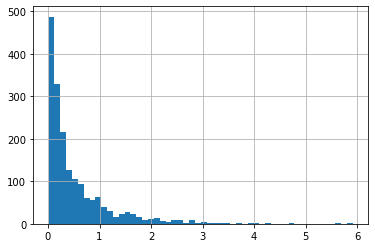

In [5]:
belize_df["reviews_per_month"].hist(bins = 52)
plt.show()

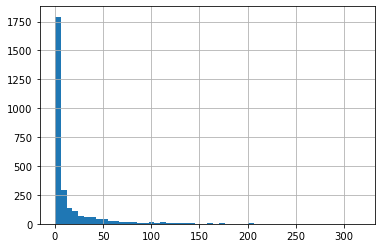

In [6]:
belize_df["number_of_reviews"].hist(bins = 52)
plt.show()

## #2
Create a box and whisker plot for availability_365. What does this show you?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a33b68c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a33b77340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a33b688e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a33b77a00>],
 'fliers': [],
 'means': []}

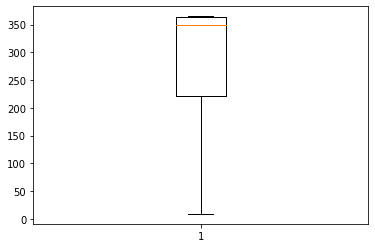

In [7]:
plt.boxplot(belize_df["availability_365"], showfliers = False)

In [ ]:
#Box plots visually show the distribution of numerical data and skewness 
#through displaying the data quartiles (or percentiles) and averages.
# And then, we draw a box from the first quartile to the third quartile.

## #3
What is the probability that the price for an Airbnb is under $50.

In [11]:
TotalOutcomes = belize_df["price"].count()
EventOutcome = belize_df[belize_df.price < 50].count()

In [12]:
P = (EventOutcome/TotalOutcomes) * 100

In [13]:
P.head(1)

id    1.752504
dtype: float64

In [ ]:
#The probablity that that the price is below $50 is 1.75%. To calculate this we take the count of events the price
#is lower than $50 which is 49 and then divide it by the total count of this event happening which is the total count 
#of values in price column in the data frame.

In [ ]:
#This data fits most into the Continuous uniform distribution

## #4
Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.	Why sample variance and not population variance?
b.	What is your takeaway for each metric?
c.	What are the scales of measurement for each of these values? 

In [14]:
#sample variance
belize_df[["latitude", "longitude","price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].var(ddof=1)

latitude                               0.288841
longitude                              0.147361
price                             317109.568066
minimum_nights                        32.147122
number_of_reviews                    919.773508
reviews_per_month                      0.438448
calculated_host_listings_count      2674.046405
availability_365                   14548.613157
dtype: float64

In [16]:
#standard deviation
belize_df[["latitude", "longitude","price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].std()

latitude                            0.537440
longitude                           0.383876
price                             563.124825
minimum_nights                      5.669843
number_of_reviews                  30.327768
reviews_per_month                   0.662154
calculated_host_listings_count     51.711183
availability_365                  120.617632
dtype: float64

In [ ]:
belize_df.head(2)

a) We pick sample variance because we're calculating it for the sample of data not the population data

b) Variance measures how dispersed data points are from the mean. Price has the highest variance which means that the data point are the most spread out from the mean compared to the other columns. On the flip side, longtitude has the lowest variance which means that the data point are pretty similar which makes sense because the location of these places might be in the same geographical area. Standard deviation tells you how far, on average, each value lies from the mean. So again, we can see that the longtitute data points have the lowest standard deviation which means they lie closest to the data mean.

c) The scale of measurement for these values is ratio which is the same as the interval but also has the concept of 0.

## #5 
What percent of Airbnb listings in Belize are available 360 days a year or more?
a.	360 days or less?
b.	What distribution does this data most closely fit?

In [18]:
#5
year_availablity = belize_df[belize_df.availability_365 >= 360].count()
total_num_of_outcomes = belize_df["availability_365"].count()

In [19]:
Percent = year_availablity/total_num_of_outcomes

In [20]:
(Percent *100).head(1)

id    39.520744
dtype: float64

In [21]:
#39% of the listings are available 360 days a year or more

In [22]:
#5a
less_than_year_availability = belize_df[belize_df.availability_365 <= 360].count()
total_num_of_outcomes = belize_df["availability_365"].count()
percent_less_than_year_availability = less_than_year_availability/total_num_of_outcomes

In [24]:
(percent_less_than_year_availability *100).head(1)

id    61.552217
dtype: float64

In [ ]:
#61.5% of the listings are available 360 days a year or less. 
#Also, we could've calculated the % of listiongs for 360 days or less by doing: (100 - % of listiongs for 360 days or by doing)

5b) This data fits most into the Continuous uniform distribution

##  #6 
What minimum night count are 75% of Airnbnb listing in Belize greater than?